### Importation des librairies

In [1]:
import os  #Ce module est une bibliothèque dédié aux besoins de gestion de fichiers et de dossiers.
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange
import numpy as np
import os.path

### Importation des données

In [2]:
#Affichage du dossier de travail
data_dir = 'C:\\Users\\Houda\\Desktop\\GarbageDataSet'
#Affichage des sous-dossiers du dossier de travail
classes = os.listdir(data_dir)
print(classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [3]:
os.listdir(os.path.join(os.getcwd(),"garbagedataset"))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

#### Importation des images contenues dans data_dir dans la variable dataset tout en les convertissant en "tensor" qui représente le format interne des vecteurs et matrices que Pytorch utilise.


In [4]:
dataset = datasets.ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((128,128)),transforms.ToTensor()]))

#Affichage de la taille du dataset:
print(len(dataset))

2527


Label: cardboard


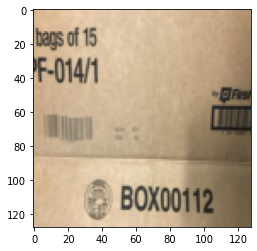

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label])
    plt.imshow(img.permute(1, 2, 0)) #Réarrangement du tenseur en prenant en compte l'ordre désiré.
    
img, label = dataset[189]
show_sample(img, label)

##### Le dataset contient 2527 images. Nous allons diviser notre dataset en 3 ensembles :
  train set (60%)
 – validation set (20%)
 – test set (20%)

In [6]:
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed)
train_set, validation_set, test_set = random_split(dataset, [1517, 505, 505])

In [7]:
print("Nombre d'images contenues dans le train set: {}".format(len(train_set)))
print("Nombres d'images contenues dans le test set: {}".format(len(test_set)))
print("Nombres d'images contenues dans le validation set: {}".format(len(validation_set)))

Nombre d'images contenues dans le train set: 1517
Nombres d'images contenues dans le test set: 505
Nombres d'images contenues dans le validation set: 505


##### Ensuite, On utilisera un DataLoader qui se chargera de mélanger et de grouper en lots les données.

In [8]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

##### Maintenant que nos data loaders sont prêts, nous pouvons définir et entrainer notre modèle. Dans le cadre de ce projet, nous avons choisi le réseau de neurones convolutifs (CNN). En particulier, ResNet-18 qui est formé, en profondeur, de 18 couches. Nous avons testé plusieurs architectures de CNN et c'est ResNet-18 qui s'est révélé avoir la plus grande précision.

In [9]:
import torchvision.models as models
model = models.resnet50(pretrained=True)    

import torch.nn as nn

# Fonction de perte (Loss function) et l'Optimizer :
criterion = nn.CrossEntropyLoss()  # Calculer l’erreur entre la prévision du réseau et la valeur réelle.
optimizer = torch.optim.Adam(model.parameters(), lr=1e-05) #algorithme d'optimisation


for epoch in trange(3):  
    for images, labels in tqdm(train_loader):
        # Réinitialisation du gradient :
        optimizer.zero_grad()

        # Forward pass
        x = images  
        y = model(x)  #calcul de la sortie du réseau
        loss = criterion(y, labels) #calcul de la perte
        
        # Backward pass
        loss.backward() # rétro-propagation de la correction d’erreur dans les couches antérieures du réseau
        optimizer.step() #correction des poids synaptiques à partir des gradients calculés

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Houda/.cache\torch\hub\checkpoints\resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1517 [00:00<?, ?it/s]

  0%|          | 0/1517 [00:00<?, ?it/s]

  0%|          | 0/1517 [00:00<?, ?it/s]

### Test du modèle

In [15]:
correct = 0
total = len(test_set)

with torch.no_grad():
    # Itération sur les minibatchs du test set  
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images  
        y = loaded_model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/505 [00:00<?, ?it/s]

Test accuracy: 0.4891089200973511


### Visualisation des prédictions

Label: paper , Predicted: paper


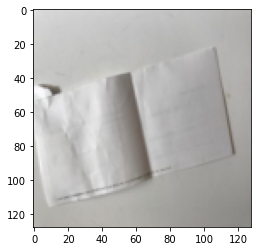

In [25]:
def predict_image(img, model):
    # Convertir à un batch de taille 1
    xb = img.unsqueeze(0)
    # Dégager les prédictions à partir du modèle
    yb = loaded_model(xb)
    # Choisir l'indice ayant la probabilité la plus élevée
    prob, preds  = torch.max(yb, dim=1)
    # Récupérer l'étiquette de la classe
    return dataset.classes[preds[0].item()]

img, label = test_set[260]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, loaded_model))

In [10]:
import pickle

# Saving model to disk
#pickle.dump(model, open('modelACC068.pkl','wb'))


In [ ]:
pwd

In [16]:
loaded_model = pickle.load(open('modelACC068.pkl', 'rb'))